## Reading the Data

In [8]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data/spotify.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Generating a Regression Model 

* X = ```in_spotify_playlists``` (constant)
* Y = ```streams```

In [9]:
x = df['in_spotify_playlists']
y = df.streams
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) # will be used later
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1575.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          6.74e-204
Time:                        14:09:30   Log-Likelihood:                -20073.
No. Observations:                 952   AIC:                         4.015e+04
Df Residuals:                     950   BIC:                         4.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.193e+08 

## Plotting Linear Regression With 2 Variables

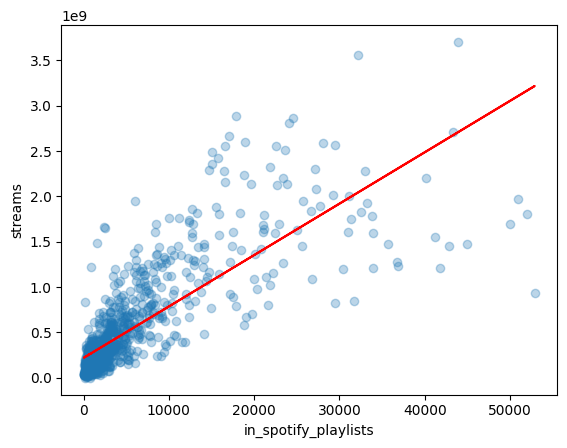

In [10]:
plt.scatter(x['in_spotify_playlists'], y, alpha=0.3)
plt.xlabel('in_spotify_playlists')
plt.ylabel('streams')
plt.plot(x['in_spotify_playlists'], predictions, color='red')
plt.show()

## Multiple Regression
Can ```streams``` be more accurately predicted with 3 constants (```in_spotify_playlists```, ```in_spotify_charts```, ```in_apple_playlists```)?

* x = ```in_spotify_playlists```, ```in_spotify_charts```, ```in_apple_playlists``` (constant)
* y = ```streams```

In [12]:
x = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']]
y = df.streams
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) # will be used later
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     809.4
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          7.02e-261
Time:                        14:19:45   Log-Likelihood:                -19934.
No. Observations:                 952   AIC:                         3.988e+04
Df Residuals:                     948   BIC:                         3.990e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.252e+08 